In [389]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

import pickle
import warnings
warnings.filterwarnings('ignore')

In [315]:
big = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
big.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Features :**
- Item_Identifier: Id of the items.
- Item_Weight: Weight of item.
- Item_Fat_Content: Fat present in item.
- Item_Visibility: Visible of the item.
- Item_Type: Item type.
- Item_MRP: Price of item.
- Outlet_Identifier: Id of outlet.
- Outlet_Establishment_Year: In which year the outlet was established.
- Outlet_Size: Size of the outlet.
- Outlet_Location_Type: Location type of outlet.
- Outlet_Type: Type of outlet.

**Target :**
- Item_Outlet_Sales: Sale of the outlet

## Data Description.

In [316]:
big.shape

(8523, 12)

In [317]:
big.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [318]:
big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [319]:
big.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Column with null values : Item_Weight, Outlet_Size 

## Data Cleaning.

In [320]:
big.dropna(subset = ['Item_Weight'],inplace = True)
big.shape

(7060, 12)

Dropping Item Weight nulls, as every product will have there own weight.

In [321]:
big['Outlet_Size'] = big['Outlet_Size'].fillna(big['Outlet_Size'].mode()[0])

In [322]:
big[['Item_Weight','Outlet_Size']].isna().sum()

Item_Weight    0
Outlet_Size    0
dtype: int64

Now, our dataset is cleaned and also no null values present in our dataset.

## EDA :

**- Visualisation.**

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

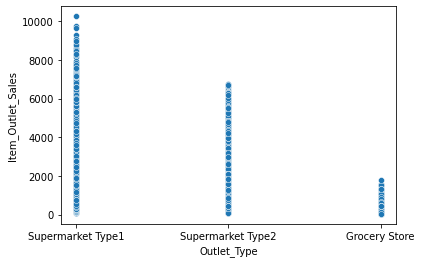

In [323]:
sns.scatterplot(x = 'Outlet_Type',y = 'Item_Outlet_Sales', data = big)

**- Scatterplot between Outlet type and Item outlet sales.**
- Supermarket Type 1, has the highest Item outlet sales.
- Then Supermarket Type 2.
- Lowest Item outlet sales is of Grocery Store.

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

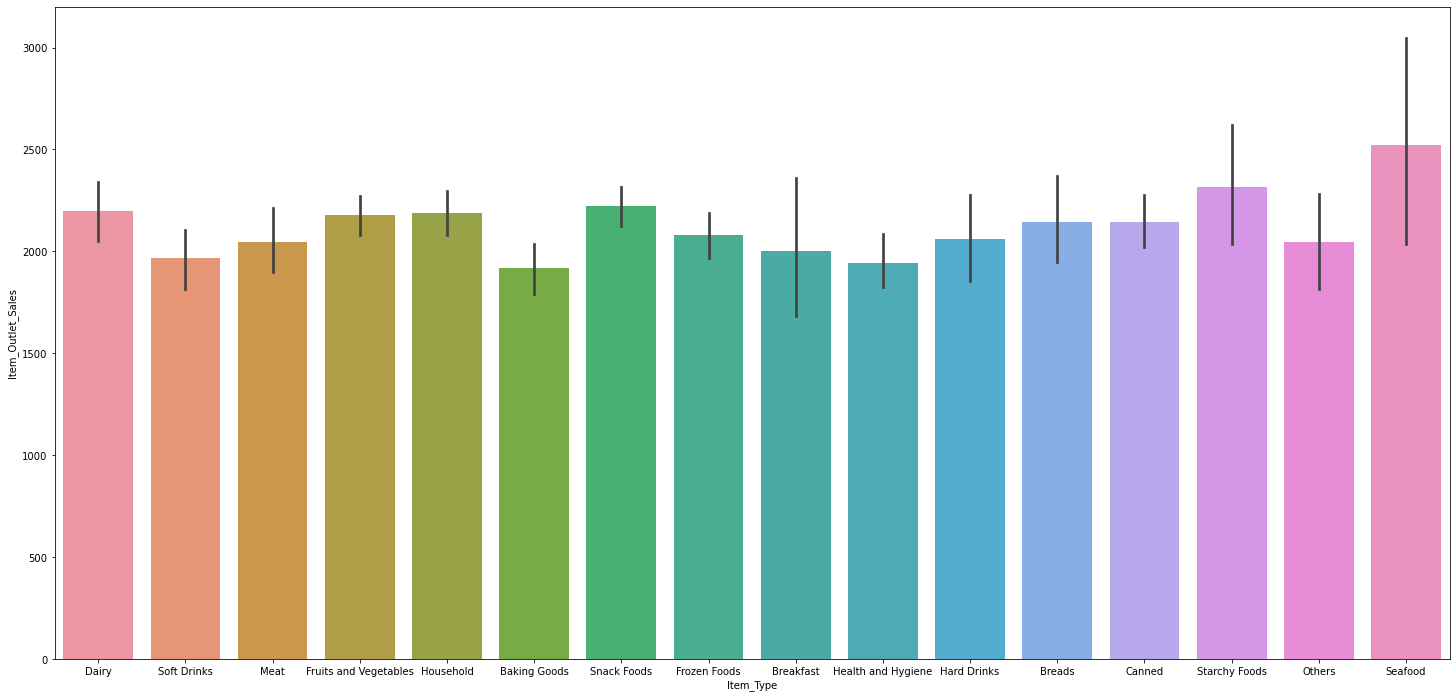

In [324]:
plt.figure(figsize = (25,12))
sns.barplot(x = 'Item_Type',y = 'Item_Outlet_Sales',data = big)

**- Barplot between Item type and Item outle sales.**
- Highest item outlet sales is of Seafood.
- Lowest are Baking Goods and Health & Hygiene.

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

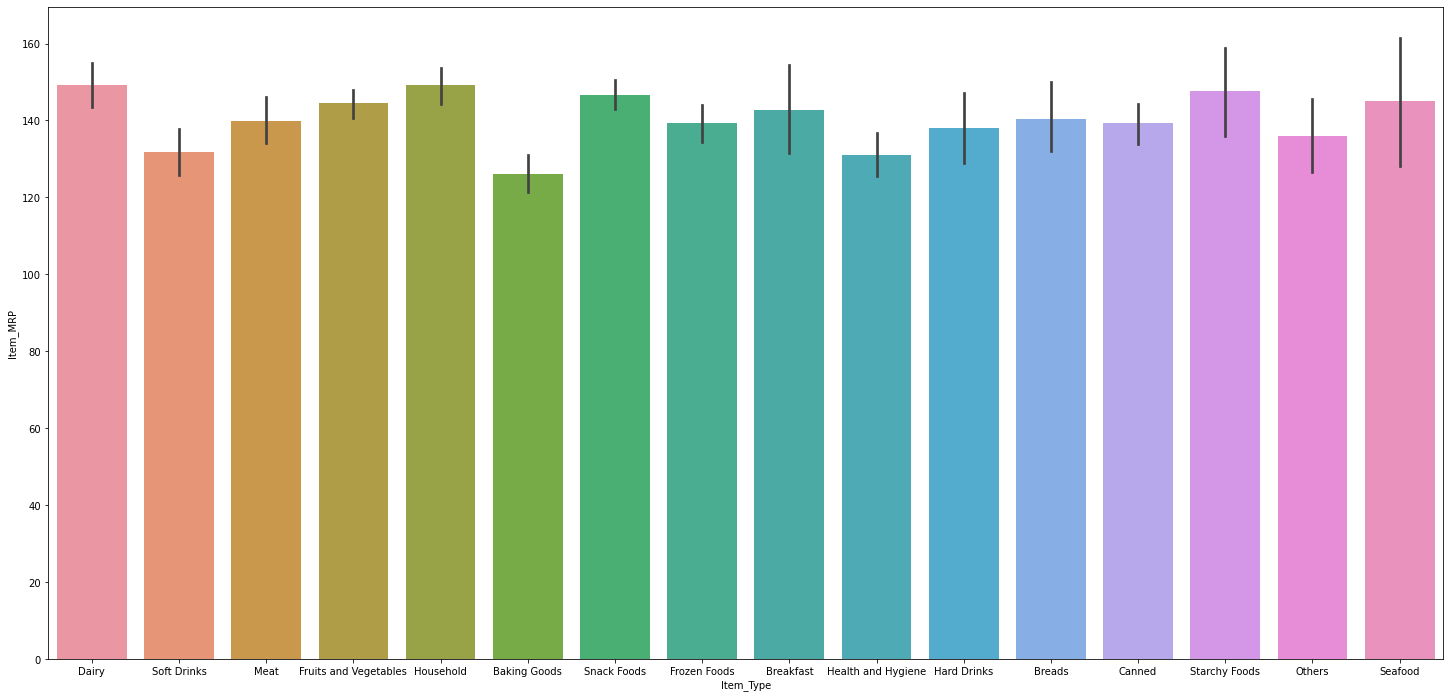

In [325]:
plt.figure(figsize = (25,12))
sns.barplot(x = 'Item_Type',y = 'Item_MRP',data = big)

**- Barplot between Item type and Item MRP.**
- Highest MRP item is Dairy.
- Lowest item is Baking Goods.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

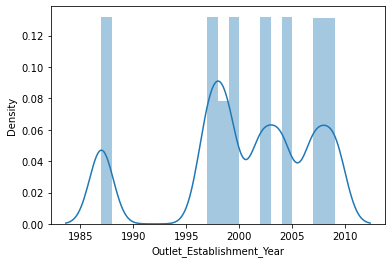

In [326]:
sns.distplot(big['Outlet_Establishment_Year'])

**- Distplot for Outles establishment year.**
- Most of the outlets are established between 1995 to 2000.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

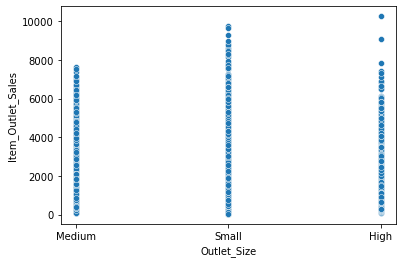

In [327]:
sns.scatterplot(x = 'Outlet_Size',y = 'Item_Outlet_Sales',data = big)

**- Scatterplot between Outlet size and Item oulter sales.**
- Small outlets has the highest sales.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

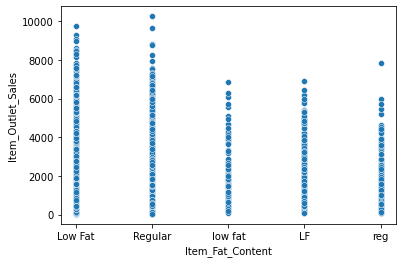

In [328]:
sns.scatterplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = big)

**- Scatterplot between Item fat content and Item outlet sales.**
- Regular fat item have more sale then low fat items.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

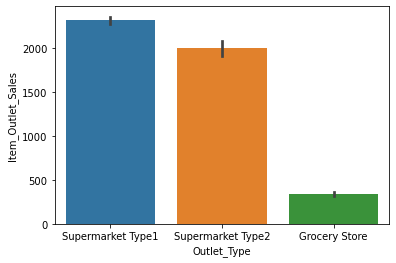

In [329]:
sns.barplot(x = 'Outlet_Type',y = 'Item_Outlet_Sales',data =big)

**- Barplot between Outlet type and item outlet sales.**

Top to low.
- Supermarket type 1.
- Supermarket type 2.
- Grocery Store.

## Encoding:

In [330]:
big = big.drop(columns=['Outlet_Establishment_Year'])

In [331]:
lab = LabelEncoder()

In [332]:
big['Item_Identifier'] = lab.fit_transform(big['Item_Identifier'])
big['Outlet_Identifier'] = lab.fit_transform(big['Outlet_Identifier'])
big['Item_Type'] = lab.fit_transform(big['Item_Type'])
big['Outlet_Location_Type'] = lab.fit_transform(big['Outlet_Location_Type'])
big['Outlet_Size'] = lab.fit_transform(big['Outlet_Size'])
big['Outlet_Type'] = lab.fit_transform(big['Outlet_Type'])

In [333]:
big['Item_Fat_Content'] = big['Item_Fat_Content'].replace('Low Fat',0)
big['Item_Fat_Content'] = big['Item_Fat_Content'].replace('LF',0)
big['Item_Fat_Content'] = big['Item_Fat_Content'].replace('low fat',0)

In [334]:
big['Item_Fat_Content'] = big['Item_Fat_Content'].replace('Regular',1)
big['Item_Fat_Content'] = big['Item_Fat_Content'].replace('reg',1)

In [335]:
big.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,7,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,660,17.50,0,0.016760,10,141.6180,7,1,0,1,2097.2700
3,1117,19.20,1,0.000000,6,182.0950,0,2,2,0,732.3800
4,1293,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052


Final and cleaned dataset.

**- Outliers :**

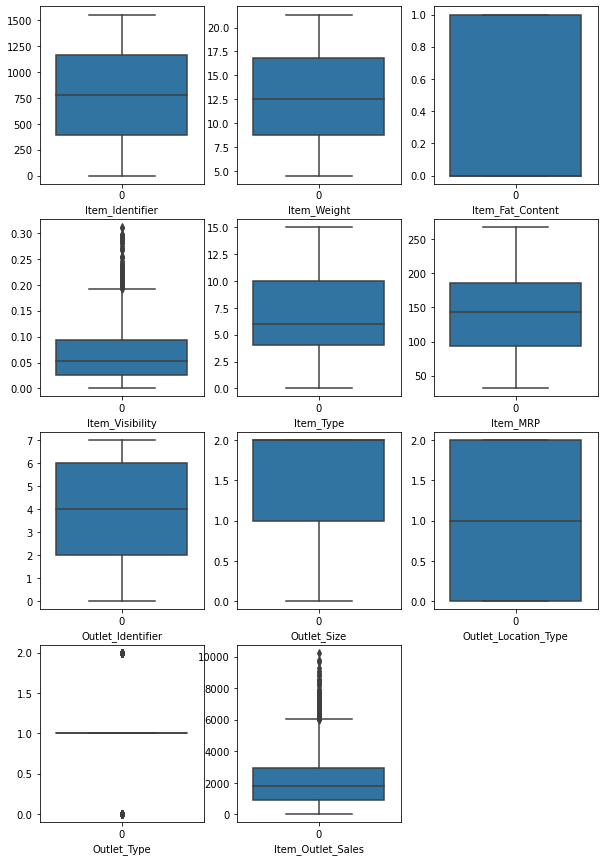

In [240]:
plt.figure(figsize = (10,15))
graph = 1
for column in big:
    if graph <= 12:
        plt.subplot(4,3,graph)
        ax = sns.boxplot(data = big[column])
        plt.xlabel(column)
    graph += 1
plt.show()

Outliers are present in Item_Visibility,Outlet_Type,Item_Outlet_Sales

But removing outliers on for Item_Visibility, as Outlet_Type has the categorical data and Item_Outlet_Sales is our target column.

In [340]:
q1 = big.quantile(0.25)
q3 = big.quantile(0.75)
iqr = q3 - q1

In [344]:
high = (q3.Item_Visibility + (1.5 * iqr.Item_Visibility))
print(high)

index = np.where(big['Item_Visibility'] > high)
print(index)

big = big.drop(big.index[index])
print(big.shape)

big.reset_index()

0.19178187337499997
(array([  52,  145,  406,  421,  431,  561,  785, 1035, 1051, 1070, 1223,
       1349, 1356, 1443, 1517, 1717, 1722, 1753, 1931, 1939, 2032, 2274,
       2383, 2501, 2644, 2784, 2836, 2913, 2921, 3311, 3527, 3536, 3643,
       3689, 3792, 3890, 4000, 4051, 4131, 4169, 4210, 4227, 4234, 4255,
       4307, 4414, 4477, 4485, 4540, 4702, 4777, 4820, 4863, 4904, 5004,
       5447, 5478, 5537, 5558, 5560, 5690, 5753, 5798, 5826, 5912, 5995,
       6023, 6134, 6336, 6931, 6984, 7046]),)
(6988, 11)


,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,156,9.300,0,0.016047,4,249.8092,7,1,0,1,3735.1380
1,1,8,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,2,660,17.500,0,0.016760,10,141.6180,7,1,0,1,2097.2700
3,3,1117,19.200,1,0.000000,6,182.0950,0,2,2,0,732.3800
4,4,1293,8.930,0,0.000000,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
6983,8518,369,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834
6984,8519,893,8.380,1,0.046982,0,108.1570,5,2,1,1,549.2850
6985,8520,1353,10.600,0,0.035186,8,85.1224,4,2,1,1,1193.1136
6986,8521,679,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976


<AxesSubplot:xlabel='Item_Visibility'>

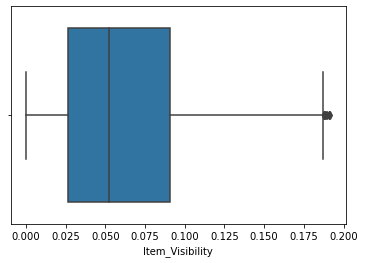

In [346]:
sns.boxplot(big['Item_Visibility'])

After removing outliers.

## Correlation.

In [347]:
df_corr = big.corr().abs()

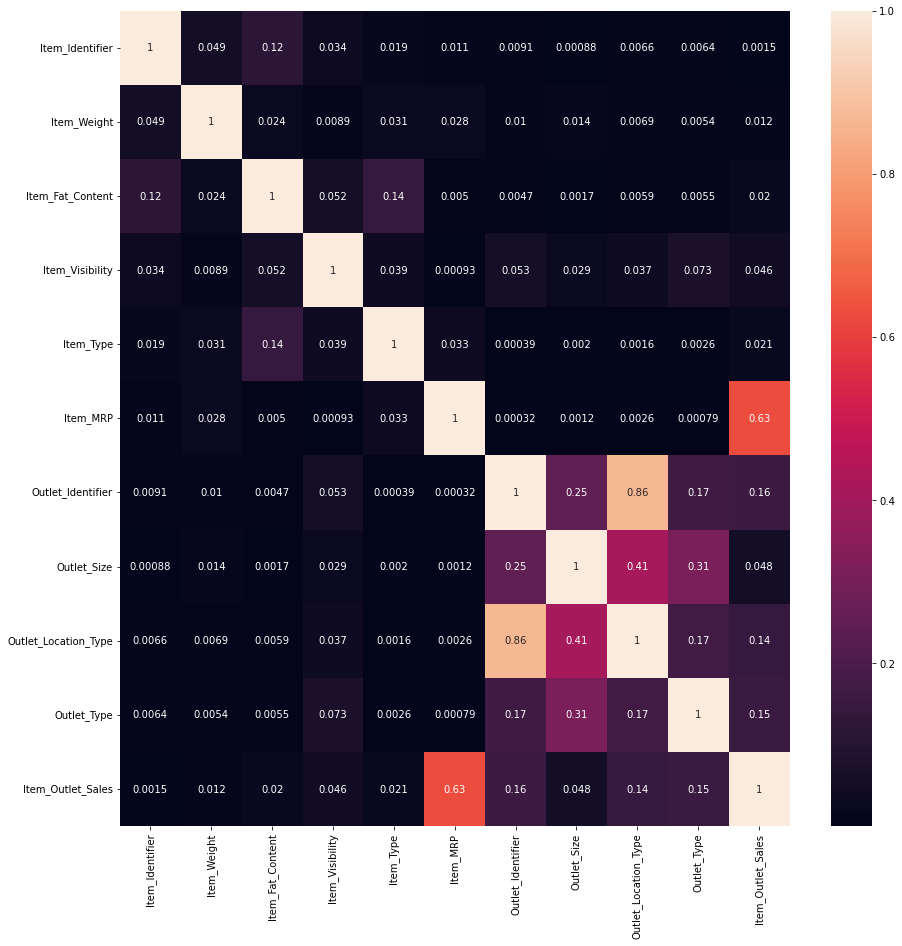

In [348]:
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)
plt.show()

- Outlet_Location_Type and Outlet_Identifier, are correlated columns, so droping one of the column.

In [349]:
big = big.drop(columns = ['Outlet_Location_Type'])

In [350]:
big.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,7,1,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,1,2,443.4228
2,660,17.50,0,0.016760,10,141.6180,7,1,1,2097.2700
3,1117,19.20,1,0.000000,6,182.0950,0,2,0,732.3800
4,1293,8.93,0,0.000000,9,53.8614,1,0,1,994.7052


**- Seperating Features and Target columns.**

In [351]:
x = big.drop('Item_Outlet_Sales',axis = 1)
y = big.Item_Outlet_Sales

**- Using Standard scaler on features to scale the values.**

In [352]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Training the Model

**- Train Test Split.**

In [353]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 4 )

**- Creating The function for the training and testing score, so that, we can get the results just by calling the function.**

In [362]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))
        print('\n Scatter Plot \n')
        plt.scatter(y_test, pred)
        plt.xlabel("Actual Sales")
        plt.ylabel("Predicted Sales")
        plt.title("Actual VS Prediction")
        plt.show()

**- Model Instantiating.**

In [363]:
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()
ada = AdaBoostRegressor()
rf = RandomForestRegressor()

**- KNeighborsRegressor Model.**


 ----- Train Result ----- 

R2 Score: 0.6162003580529608

 ----- Test Result ----- 

R2 Score: 0.39531407030287113

 Scatter Plot 



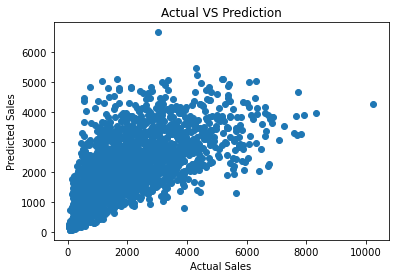

In [364]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

**- GradientBoostingRegressor Model.**


 ----- Train Result ----- 

R2 Score: 0.5715243083380075

 ----- Test Result ----- 

R2 Score: 0.4851345523333681

 Scatter Plot 



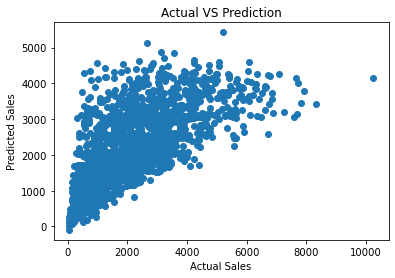

In [365]:
gbr.fit(x_train,y_train)
score(gbr, x_train,x_test,y_train,y_test,train = True)
score(gbr, x_train,x_test,y_train,y_test,train = False)

**- AdaBoostRegressor Model.**


 ----- Train Result ----- 

R2 Score: 0.48711039544313794

 ----- Test Result ----- 

R2 Score: 0.44123297458143507

 Scatter Plot 



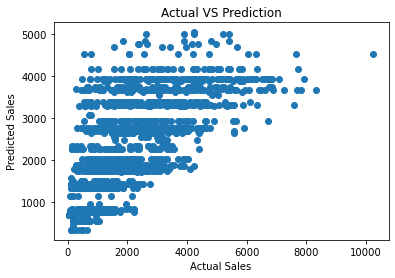

In [366]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- RandomForestRegressor Model.**


 ----- Train Result ----- 

R2 Score: 0.9255982502113707

 ----- Test Result ----- 

R2 Score: 0.43323444356243335

 Scatter Plot 



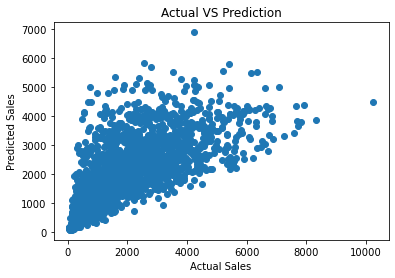

In [367]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

GradientBoostingRegressor Model gives the best training and testing score among all.

## Test Dataset.

In [374]:
big_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
big_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [375]:
big_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [376]:
big_test.dropna(subset = ['Item_Weight'],inplace = True)
big_test['Outlet_Size'] = big_test['Outlet_Size'].fillna(big_test['Outlet_Size'].mode()[0])
big_test[['Item_Weight','Outlet_Size']].isna().sum()

Item_Weight    0
Outlet_Size    0
dtype: int64

In [377]:
big_test = big_test.drop(columns=['Outlet_Establishment_Year'])

In [378]:
big_test['Item_Identifier'] = lab.fit_transform(big_test['Item_Identifier'])
big_test['Outlet_Identifier'] = lab.fit_transform(big_test['Outlet_Identifier'])
big_test['Item_Type'] = lab.fit_transform(big_test['Item_Type'])
big_test['Outlet_Location_Type'] = lab.fit_transform(big_test['Outlet_Location_Type'])
big_test['Outlet_Size'] = lab.fit_transform(big_test['Outlet_Size'])
big_test['Outlet_Type'] = lab.fit_transform(big_test['Outlet_Type'])

In [379]:
big_test['Item_Fat_Content'] = big_test['Item_Fat_Content'].replace('Low Fat',0)
big_test['Item_Fat_Content'] = big_test['Item_Fat_Content'].replace('LF',0)
big_test['Item_Fat_Content'] = big_test['Item_Fat_Content'].replace('low fat',0)

In [380]:
big_test['Item_Fat_Content'] = big_test['Item_Fat_Content'].replace('Regular',1)
big_test['Item_Fat_Content'] = big_test['Item_Fat_Content'].replace('reg',1)

In [381]:
big_test = big_test.drop(columns = ['Outlet_Location_Type'])

In [382]:
big_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type
0,1089,20.750,0,0.007565,13,107.8622,7,1,1
1,1053,8.300,1,0.038428,4,87.3198,2,2,1
2,1390,14.600,0,0.099575,11,241.7538,0,2,0
3,796,7.315,0,0.015388,13,155.0340,2,2,1
5,454,9.800,1,0.063817,6,117.1492,6,2,1
...,...,...,...,...,...,...,...,...,...
5676,230,10.500,1,0.013496,13,141.3154,6,2,1
5677,305,7.600,1,0.142991,15,169.1448,3,1,2
5678,1396,10.000,0,0.073529,8,118.7440,5,2,1
5679,507,15.300,1,0.000000,3,214.6218,2,2,1


**- Prediction For Test Dataset.**

In [383]:
y_pred = gbr.predict(big_test)
y_pred

array([5768.95178379, 6018.51736081, 5777.10365514, ..., 5768.95178379,
       6018.51736081, 6018.51736081])

In [387]:
a = []
for i in y_pred:
    a.append(i)
a

[5768.951783785435,
 6018.517360808992,
 5777.10365514154,
 5768.951783785435,
 6018.517360808992,
 6507.238081720017,
 6018.517360808992,
 6257.672504696462,
 5768.951783785435,
 5768.951783785435,
 5768.951783785435,
 6245.880566799209,
 6507.238081720017,
 5768.951783785435,
 5768.951783785435,
 5810.974251320333,
 6245.880566799209,
 5802.822379964227,
 5768.951783785435,
 5768.951783785435,
 6026.669232165097,
 5768.951783785435,
 5768.951783785435,
 5768.951783785435,
 5768.951783785435,
 6018.517360808992,
 5768.951783785435,
 5768.951783785435,
 6394.0451148853945,
 5768.951783785435,
 5768.951783785435,
 5777.10365514154,
 5802.822379964227,
 5768.951783785435,
 5740.732798945908,
 6245.880566799209,
 5794.494030088581,
 5768.951783785435,
 5768.951783785435,
 5768.951783785435,
 5768.951783785435,
 6245.880566799209,
 6018.517360808992,
 6018.517360808992,
 5768.951783785435,
 6495.4461438227645,
 6245.880566799209,
 6018.517360808992,
 6507.238081720017,
 6018.517360808992,


In [388]:
len(a)

4705

In [390]:
filename = 'Big_data_Mart.pickle'
pickle.dump(gbr, open(filename, 'wb'))